In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
from sklearn.metrics import r2_score

In [5]:
# Langkah 1: Muat data Anda ke dalam DataFrame
# Gantilah 'data_beras.csv' dengan nama file yang sesuai dengan data Anda.
data = pd.read_csv('data_panjang.csv')

In [6]:
# Langkah 2: Membagi data menjadi fitur (tanggal) dan target (harga)
X = data[['tanggal']]
y = data['harga']

KeyError: "None of [Index(['tanggal'], dtype='object')] are in the [columns]"

In [194]:
# Langkah 3: Ubah tanggal menjadi fitur numerik yang dapat digunakan oleh model
# Anda dapat menggunakan metode .apply() untuk mengubah format tanggal menjadi jumlah hari sejak awal Agustus 2023.
tanggal_awal = datetime(2023, 8, 1)  # Tanggal awal Agustus 2023
X = X.copy()  # Buat salinan DataFrame X
X['tanggal'] = X['tanggal'].apply(lambda x: (datetime.strptime(x, '%m/%d/%Y') - tanggal_awal).days)

In [195]:
# Langkah 4: Inisialisasi dan latih model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X, y)

RandomForestRegressor(random_state=0)

In [196]:
# Langkah 5: Prediksi harga terendah dan harga tertinggi
# Gantilah tanggal_min dan tanggal_max dengan tanggal yang sesuai.
tanggal_min_str = '8/1/2023'  # Ganti dengan tanggal terendah yang ingin Anda prediksi.
tanggal_max_str = '8/31/2023'  # Ganti dengan tanggal tertinggi yang ingin Anda prediksi.


In [197]:
# Ubah tanggal menjadi jumlah hari sejak awal Agustus 2023.
tanggal_min = (datetime.strptime(tanggal_min_str, '%m/%d/%Y') - tanggal_awal).days
tanggal_max = (datetime.strptime(tanggal_max_str, '%m/%d/%Y') - tanggal_awal).days

In [198]:
X.columns = ['']

In [199]:
# Lakukan prediksi harga terendah dan harga tertinggi
min_price = model.predict([[tanggal_min]])[0]
max_price = model.predict([[tanggal_max]])[0]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [200]:
# Langkah 6: Mengukur akurasi dengan MAE dan MSE jika Anda memiliki data aktual
# Misalnya, Anda memiliki data harga aktual yang seharusnya diprediksi
harga_actual_min = 1000.0  # Ganti dengan harga aktual pada tanggal_min
harga_actual_max = 1200.0  # Ganti dengan harga aktual pada tanggal_max

In [201]:
mae_min = mean_absolute_error([harga_actual_min], [min_price])
mse_min = mean_squared_error([harga_actual_min], [min_price])

mae_max = mean_absolute_error([harga_actual_max], [max_price])
mse_max = mean_squared_error([harga_actual_max], [max_price])

In [202]:
print(f'Prediksi harga terendah pada {tanggal_min_str}: {min_price}')
print(f'MAE harga terendah: {mae_min}')
print(f'MSE harga terendah: {mse_min}')

print(f'Prediksi harga tertinggi pada {tanggal_max_str}: {max_price}')
print(f'MAE harga tertinggi: {mae_max}')
print(f'MSE harga tertinggi: {mse_max}')

Prediksi harga terendah pada 8/1/2023: 13925.173353222906
MAE harga terendah: 12925.173353222906
MSE harga terendah: 167060106.21086347
Prediksi harga tertinggi pada 8/31/2023: 14297.606399961363
MAE harga tertinggi: 13097.606399961363
MSE harga tertinggi: 171547293.40830886


In [203]:
# Memuat data harga beras
data_beras = pd.read_csv('data_beras.csv')

In [204]:
# Analisis Statistik
harga_rata_rata_per_daerah = data_beras.groupby('daerah')['harga'].mean()
harga_tertinggi_daerah = harga_rata_rata_per_daerah.idxmax()
harga_terendah_daerah = harga_rata_rata_per_daerah.idxmin()

<Figure size 1000x600 with 0 Axes>

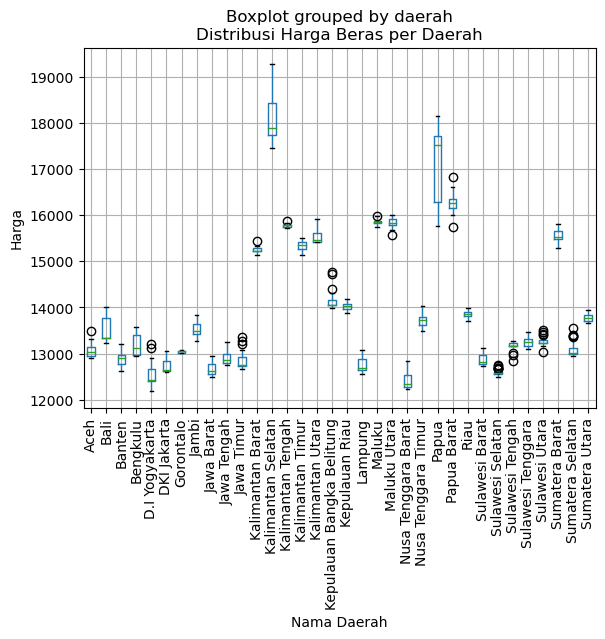

In [206]:
# Visualisasi (Opsional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data_beras.boxplot(column='harga', by='daerah')
plt.title('Distribusi Harga Beras per Daerah')
plt.xticks(rotation=90)
plt.xlabel('Nama Daerah')
plt.ylabel('Harga')
plt.show()

In [207]:
# Kesimpulan
print(f'Daerah dengan harga tertinggi: {harga_tertinggi_daerah}')
print(f'Daerah dengan harga terendah: {harga_terendah_daerah}')

Daerah dengan harga tertinggi: Kalimantan Selatan
Daerah dengan harga terendah: Nusa Tenggara Barat
